<a href="https://colab.research.google.com/github/yajima-yasutoshi/DataScience/blob/main/20250128/%E5%88%86%E6%9E%90%E8%AA%B2%E9%A1%8C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# データサイエンス概論（第15回）

20250128

# 予測モデル構築の流れ

1. データ入手と概要の確認
  
  * データの項目（意味やデータの型の確認）、レコード数を確認する。
  * 目的変数となる項目の特定  
    
      予測の目的を明確化する。また目的（数値予測 or カテゴリ予測）に対応した
      データ項目はどれか、適切なデータ型であることを確認する。

  * 説明変数となる項目の特定  
     全ての項目が予測に関係しない場合もある。例えば、顧客IDなどは説明変数として用いることはあまり考えにくい。
  

2. データの前処理

  * 欠測値（欠損値）の確認と処理
  * 異常値（外れ値）の確認と処理


3. 基礎集計

  * 数値型の項目の場合
    * 最大値、最小値、平均値、中央値、標準偏差などの基本統計量の確認
    * ヒストグラム、箱ひげ図による分布の可視化

  * カテゴリ型の項目の場合
    * カテゴリ毎の件数、最頻値の確認

  * 目的変数との関連性を確認
    * 散布図などによる可視化

4. データ分割

  * データを学習（訓練）用データと評価用データに分割する。評価用を全体の2割から3割にする。
     * 学習（訓練）用データ：AIを学習するためのデータ
     * 評価用データ：AIの精度を評価するためのデータ

5. データ加工

  数値型の項目に対しては標準化、カテゴリ型の項目に対してはダミー変数の作成を行う。

6. AIの構築と精度の確認

  * 予測の目的でAIを使い分ける必要がある。代表的な手法としては、以下のものがある。
     * 数値予測
       
       重回帰モデル（これは統計モデルと呼ばれAIではない）、ランダムフォレスト
     * カテゴリ予測
     
       ロジスティック回帰（これは統計モデルと呼ばれAIではない）、決定木、ランダムフォレスト
  
    利用するモジュールと扱うことのできる予測問題
    
アルゴリズム(AI) | カテゴリ予測 | 数値予測
    -- | -- | --
    重回帰 | - | from sklearn.linear_model import LinearRegression
    ロジスティック回帰 | from sklearn.linear_model import LogisticRegression | -
    決定木  | from sklearn.tree import DecisionTreeClassifier | from sklearn.tree import DecisionTreeRegressor
    ランダムフォレスト | from sklearn.ensemble import RandomForestClassifier | from sklearn.ensemble import RandomForestRegressor


  * 訓練用のデータを使いAIを学習する。
  
      以下のアルゴリズムではハイパーパラメータチューニングが必要となる。


アルゴリズム | 調整が必要なハイパーパラメータ
      -- | --
     ロジスティック回帰 | 正則化項（C）
     決定木 | 木の深さ（max_depth）
     ランダムフォレスト |  木の数（n_estimators）、木の深さ（max_depth）、 分割の最小サンプル数（min_samples_split）

 * 精度を確認

 検証用のデータを使いモデルで予測を行う。予測結果とデータを比較することで精度を評価する。評価基準は以下の通りとなる。

  * 数値予測の場合：平均二乗誤差、決定係数
  * カテゴリ予測の場合：正解率、混同行列

# 準備


In [ ]:
# 日本語環境のインストール
!pip install japanize-matplotlib

# 必要なライブラリをインポート
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

# 必要なライブラリのインポート
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

# 決定木に必要なライブラリー
from sklearn.tree import DecisionTreeClassifier, plot_tree

# ランダムフォレストに必要なライブラリー
from sklearn.ensemble import RandomForestClassifier

# その他必要なライブラリー
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


# Iris データを使った予測モデルの構築

## データ

アイリスデータセットには、
3種類のアイリスの花（セトサ、バーシクル、バージニカ）に関するデータが
記録されている。

各項目は以下の通り

項目名 | 型 | 説明
--  | -- | --
petal_length | 数値 | 花びらの長さ
petal_width  | 数値 | 花びらの幅
sepal_length | 数値 | がく片の長さ
sepal_width  | 数値 | がく片の幅
species | カテゴリ | 花の種類（setosa, versicolor, virginica）

このデータを使い、
花びらの長さなど4つの項目（petal_length、petal_width、sepal_length、sepal_width）を説明変数として、
花の種類（species）を見分けるAIを作る。

目的変数は3種類のカテゴリ変数となっていることから、
決定木、あるいはランダムフォレストを用いてAIを構築し、その精度を確認する。

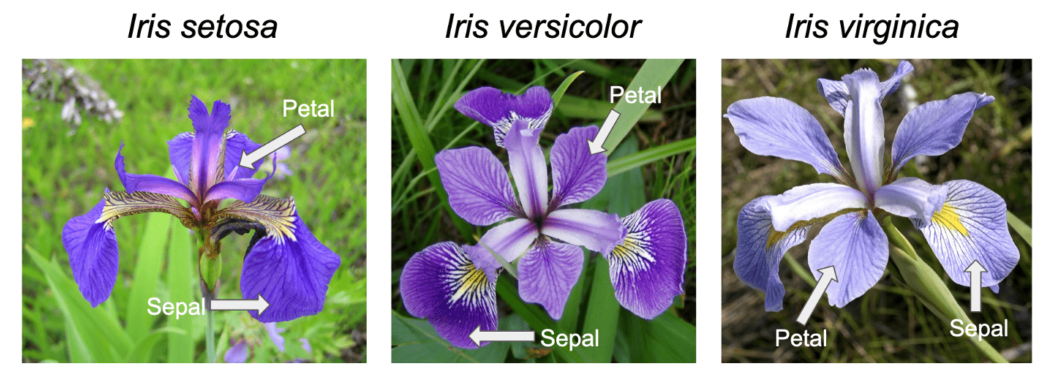

データは以下のサイトに保存してある。

https://github.com/yajima-yasutoshi/shunan-u/tree/main/data

上記のURLより、iris.csv をダウンロードして利用する。

まず初めに、CSVファイルからデータを読み込み、変数 df にセットする。以下のコードセルを完成せよ。

In [ ]:
file_name =
df = pd.read_csv(file_name)

## 決定木を使ったIrisの花の種類予測モデルの構築

決定木を用いて予測モデルを構築する。モデルの学習はデータ全体の8割とし、random_state パラメータは以下のコードセルに書かれているものを変更しないこと。

In [ ]:
# 目的変数と説明変数を設定する。
X = df.drop('species', axis=1)
y = df['species']

# データを学習用と検証用に分割する。ただし、検証用は全体の2割とする。
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# 決定木のインスタンスを作成
model = DecisionTreeClassifier(max_depth=2, random_state=42)

# 以下に必要なコードを追加して、問題に解答せよ。


## ランダムフォレストによる予測モデルの構築

ランダムフォレストを用いて予測モデルを構築する。学習用データは上で用いたものと同一とし、random_state パラメータは以下のコードセルに書かれているものを変更しないこと。

In [ ]:
# ハイパーパラメータの候補
param_grid = {
    'n_estimators': [5, 10, 20],
    'max_depth': [2, 3],
    'min_samples_split': [2, 3]
}

# グリッドサーチで最適なハイパーパラメータを探す
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid)
grid_search.fit(X_train, y_train)

# 以下に必要なコードを追加して、問題に解答せよ。
